<a href="https://colab.research.google.com/github/yootina/Deep/blob/master/231211_dl_09_time_series_practice_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title 시계열 데이터 생성

# 시계열 데이터 길이 설정
n = 365 * 4

# 시간 인덱스 생성
time = np.arange(n) # 0부터 n-1까지의 연속된 정수로 이루어진 배열을 생성합니다.
# 예를 들어, n이 200이면, 0부터 199까지의 시간 인덱스가 생성됩니다.

# 트렌드 (선형 트렌드) 생성
trend = 0.25 * time # 시간에 따라 선형적으로 증가하는 값을 만듭니다.
# 0.25는 트렌드의 기울기를 나타냅니다. 시간이 증가함에 따라 값이 0.25씩 증가합니다.

# 계절성 (주기적인 변동) 생성
seasonality = 5 * np.sin(np.pi * time / 365)
# np.sin 함수를 사용하여 주기적인 변동을 만듭니다.
# 5 * np.pi는 한 주기의 위 아래 범위를 나타내며, 365은 주기의 길이입니다.
# 이를 조합하여 주기적인 변동을 생성합니다.

# 잡음 (랜덤 잡음) 생성
noise = np.random.normal(0, 10, n)
# np.random.normal 함수를 사용하여 정규 분포를 따르는 랜덤한 잡음을 생성합니다.
# 평균이 0이고 표준 편차가 10인 잡음을 생성합니다.

# 시계열 데이터 생성 (트렌드 + 계절성 + 잡음)
time_series_data = trend + seasonality + noise
# 각 구성 요소를 더하여 전체 시계열 데이터를 생성합니다.
# 트렌드, 계절성 및 잡음이 합쳐져 있습니다.

# 트렌드, 계절성, 잡음 수정해보기.

In [ ]:
time_series_data

array([-16.47464839,  -8.3335721 ,  24.74769581, ..., 348.76886341,
       361.21617902, 374.39438543])

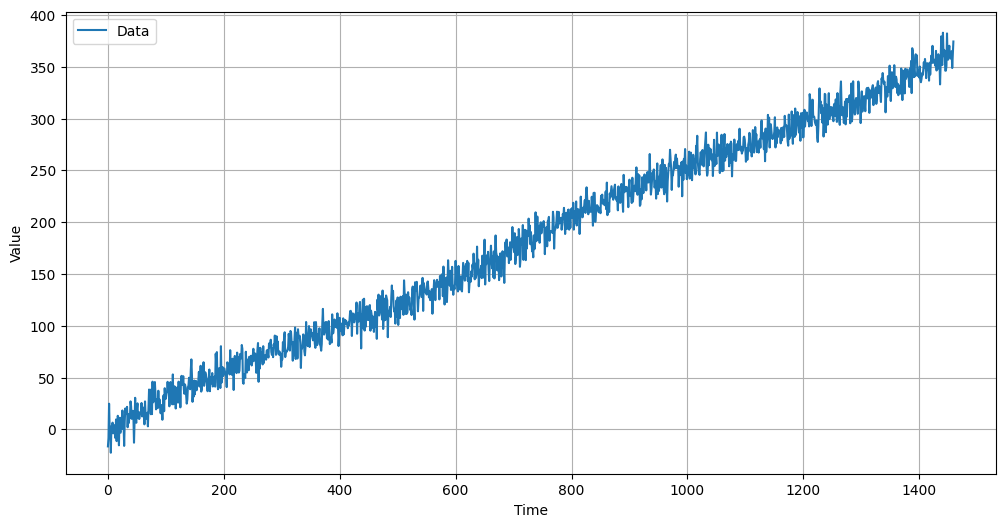

In [ ]:
#@title 시계열 데이터 시각화
plt.figure(figsize=(12, 6))  # 그림의 크기를 설정합니다.

plt.plot(time, time_series_data, label='Data')  # 시계열 데이터를 그립니다.
plt.xlabel('Time')  # x축 레이블을 설정합니다.
plt.ylabel('Value')  # y축 레이블을 설정합니다.
plt.legend()  # 범례를 표시합니다.
plt.grid(True)  # 그리드를 활성화하여 그래프를 보다 읽기 쉽게 만듭니다.
plt.show()  # 그래프를 화면에 표시합니다.

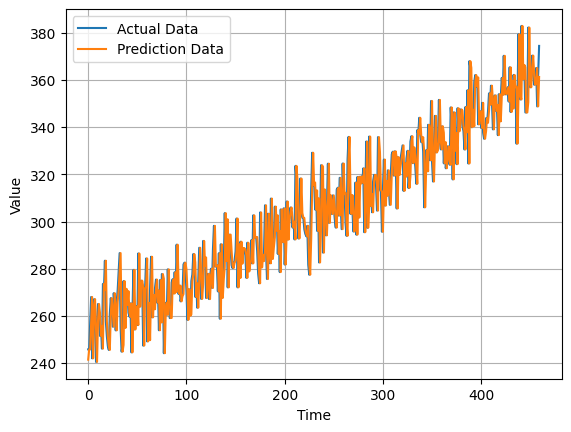

In [ ]:
#@title 단순하게 예측해보기
split_time = 1000 # 테스트셋 기준

y_true = time_series_data[split_time:]  # 1000~1459 까지 범위
y_pred = time_series_data[split_time-1:-1] # 999~1458 까지 범위
x_test = np.arange(len(y_true))

plt.plot(x_test, y_true, label='Actual Data') # 실제 데이터
plt.plot(x_test, y_pred, label='Prediction Data')  # 1씩 직전의 데이터
plt.xlabel('Time')  # x축 레이블을 설정합니다.
plt.ylabel('Value')  # y축 레이블을 설정합니다.
plt.legend()  # 범례를 표시합니다.
plt.grid(True)  # 그리드를 활성화하여 그래프를 보다 읽기 쉽게 만듭니다.
plt.show()  # 그래프를 화면에 표시합니다.

In [ ]:
#@title 정확도 측정하기
import keras

# 평균 제곱 오차 (MSE) 계산
mse = keras.losses.mean_squared_error(y_true, y_pred)
print("평균 제곱 오차 (MSE):", mse.numpy() )

# 평균 절대 오차 (MAE) 계산
mae = keras.losses.mean_absolute_error(y_true, y_pred)
print("평균 절대 오차 (MAE):", mae.numpy() )

평균 제곱 오차 (MSE): 198.1992850655664
평균 절대 오차 (MAE): 11.27239759372982


In [ ]:
#@title 이동 평균으로 예측

# 예측 데이터 초기화
y_pred_ma = np.zeros_like(time_series_data)

# 이동평균 계산 (30일 이동평균)
window_size = 30
for i in range(window_size, len(time_series_data)):
    y_pred_ma[i] = np.mean(time_series_data[i - window_size:i])
y_pred_ma = y_pred_ma[split_time:] # 1000: 만 남기기. -> base 비교해야하니까.

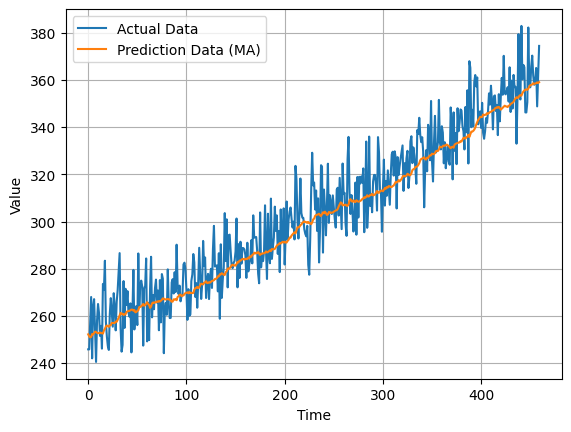

In [ ]:
plt.plot(x_test, y_true, label='Actual Data') # 실제 데이터
plt.plot(x_test, y_pred_ma, label='Prediction Data (MA)')  # 이동평균으로 예측
plt.xlabel('Time')  # x축 레이블을 설정합니다.
plt.ylabel('Value')  # y축 레이블을 설정합니다.
plt.legend()  # 범례를 표시합니다.
plt.grid(True)  # 그리드를 활성화하여 그래프를 보다 읽기 쉽게 만듭니다.
plt.show()  # 그래프를 화면에 표시합니다.

In [ ]:
# 평균 제곱 오차 (MSE) 계산
mse = keras.losses.mean_squared_error(y_true, y_pred_ma)
print("평균 제곱 오차 (MSE):", mse.numpy())

# 평균 절대 오차 (MAE) 계산
mae = keras.losses.mean_absolute_error(y_true, y_pred_ma)
print("평균 절대 오차 (MAE):", mae.numpy())

# 30일, 50일, 뭐가 더 낫나? -> 이거는 이 데이터는 만든 데이터까지 최적의 윈도우를 찾을 필요가 없다. (임의 데이터)
# 실제 데이터는 30일인지 50일인지 중요할 수 있다 -> 계절성 단위? 트렌드.

평균 제곱 오차 (MSE): 117.94846205154681
평균 절대 오차 (MAE): 8.620010716110054
